<a target="_blank" href="https://colab.research.google.com/github/wri/cities-heat-workspace/blob/dev-vinamra/notebooks/lst/thermalcomfort_statistics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:

# Install the Cities Indicator Framework package from Github
#!pip install git+https://github.com/wri/cities-cif.git
!pip install git+https://github.com/wri/cities-cif.git@bugfix/boto3

  Running command git clone --filter=blob:none --quiet https://github.com/wri/cities-cif.git 'C:\Users\Saif.Shabou\AppData\Local\Temp\pip-req-build-jqjrfxwi'
  Running command git checkout -b bugfix/boto3 --track origin/bugfix/boto3
  branch 'bugfix/boto3' set up to track 'origin/bugfix/boto3'.
  Switched to a new branch 'bugfix/boto3'



  Cloning https://github.com/wri/cities-cif.git (to revision bugfix/boto3) to c:\users\saif.shabou\appdata\local\temp\pip-req-build-jqjrfxwi
  Resolved https://github.com/wri/cities-cif.git to commit 9315f7c6e16e6293098046829496fdd7896ee587
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [3]:
# Authenticate with GEE
import ee
ee.Authenticate()
ee.Initialize(project='citiesindicators') # This can be any project that has acess to GEE

Enter verification code:  4/1ATx3LY4ZfxmZTtWNlVbkTaIhpQcNgJGVL2ao3_P2gHJUfHvKhvfD49318_o



Successfully saved authorization token.


In [4]:
import os
import leafmap
import geopandas as gpd
import geemap
import requests

In [6]:
# Import dependencies
from city_metrix.layers import Albedo, EsaWorldCoverClass, EsaWorldCover, HighLandSurfaceTemperature, LandSurfaceTemperature, TreeCover


# Select city

In [7]:
# load boundary
boundary_path = 'https://wri-cities-heat.s3.amazonaws.com/MEX-Monterrey/processed/admin_boundaries_monterrey_mun.geojson'
#boundary_path = 'https://wri-cities-heat.s3.amazonaws.com/MEX-Mexico_city/processed/admin_boundaries_mexico.geojson'
#boundary_path = 'https://wri-cities-heat.s3.amazonaws.com/MEX-Cancun/processed/admin_boundaries_cancun.geojson'
#boundary_path = 'https://wri-cities-heat.s3.amazonaws.com/MEX-Hermosillo/processed/admin_boundaries_hermosillo.geojson'
city_gdf = gpd.read_file(boundary_path, driver='GeoJSON')
city_gdf

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,19039,19,039,Monterrey,"MULTIPOLYGON (((-100.38700 25.79729, -100.3851..."


# Select Layer

Extracting layer ESA world cover from Google Earth Engine:
[########################################] | 100% Completed | 13.34 s


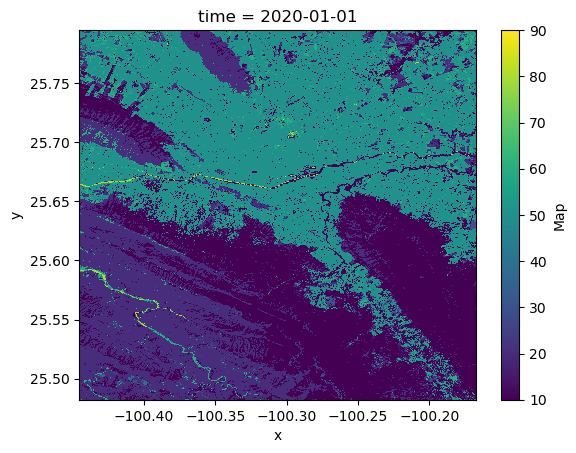

In [15]:
# ESA World cover layer
city_LandCover = EsaWorldCover().get_data(city_gdf.total_bounds)
city_LandCover.plot()
city_LandCover.rio.to_raster("city_LandCover.tif")

Extracting layer tree cover from Google Earth Engine:
[########################################] | 100% Completed | 26.26 s


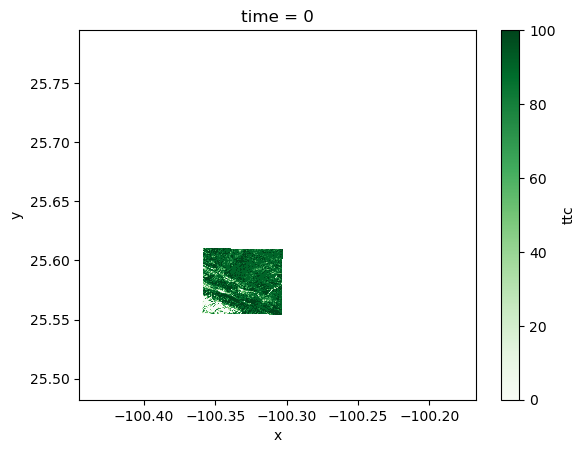

In [11]:
# Tree Cover
city_TreeCover = TreeCover().get_data(city_gdf.total_bounds)
city_TreeCover.plot(cmap="Greens")
city_TreeCover.rio.to_raster("city_TreeCover.tif")

Extracting layer LST from Google Earth Engine:
[########################################] | 100% Completed | 3.02 ss


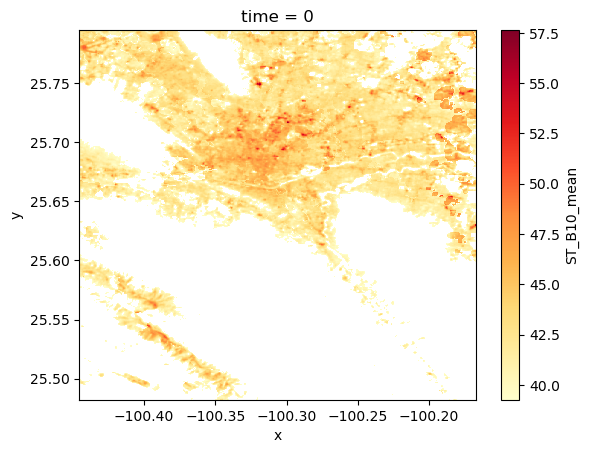

In [16]:
# HIGH LST
city_high_lst = HighLandSurfaceTemperature().get_data(city_gdf.total_bounds)
city_high_lst.plot(cmap="YlOrRd")
city_high_lst.rio.to_raster("city_high_lst.tif")

# Map viewer

In [22]:
m = leafmap.Map()
# city_EsaLandCover
m.add_raster('./city_LandCover.tif',
             cmap='tab10',
             layer_name='ESA Land Cover')
# city_TreeCover
m.add_raster('./city_TreeCover.tif',
             cmap='Greens',
             layer_name='city_TreeCover')
# High LST
m.add_raster('./city_high_lst.tif',
             cmap='YlOrRd',
             layer_name='High LST')
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…